In [1]:
# Plot the hourly STA-LTA detection numbers for the observation period

In [2]:
## Importing modules
from os.path import join, dirname   
from matplotlib.pyplot import show
from pandas import read_csv, to_datetime, DataFrame
from utils_basic import ROOTDIR, INNER_STATIONS
from utils_sta_lta import plot_station_hourly_detections

In [3]:
## Inputs
sta_lta_dir = "detections_sta0.01s_lta0.20s_on5_off2"
stations_highlight = ["A04", "A10", "B04", "B13", "B15"]
ymax = 9500

In [4]:
## Read the data
datapath = join(ROOTDIR, sta_lta_dir, "hourly_detection_numbers.csv")
df = read_csv(datapath, na_values=["nan"], parse_dates=["hour"])


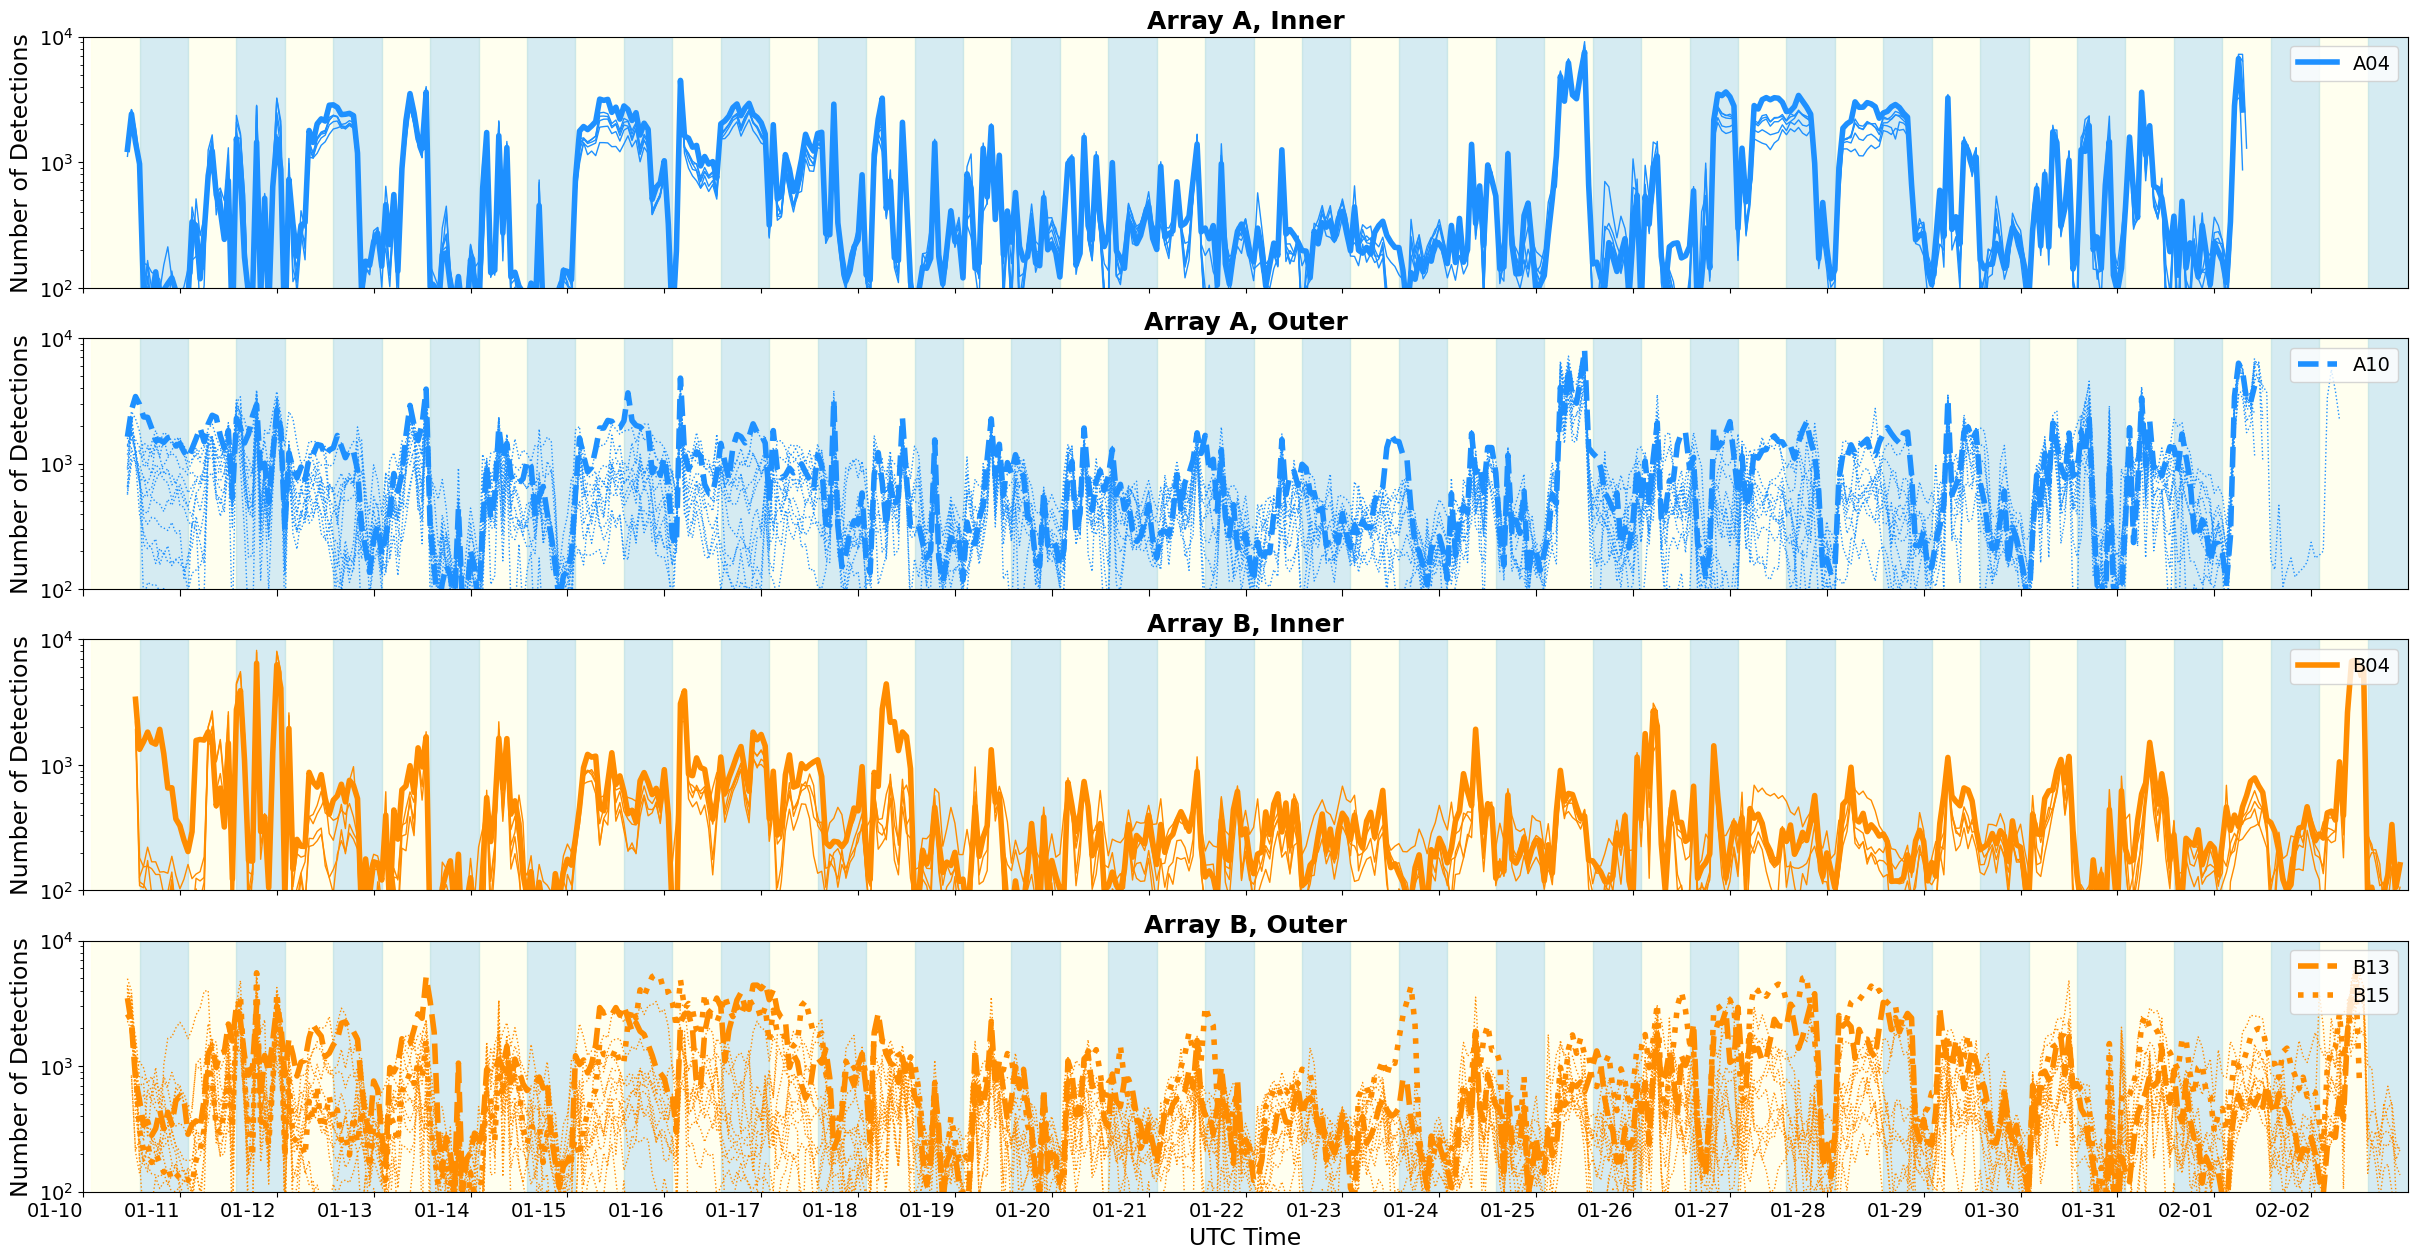

In [5]:
fig, axes = plot_station_hourly_detections(df, individual_color=True, days_and_nights=True, stations_highlight=stations_highlight, log=True)
show()

In [6]:
## Save the figure
fig.tight_layout()
fig.patch.set_alpha(0)

outdir = dirname(datapath)
outpath = join(outdir, "hourly_detection_numbers.png")
fig.savefig(outpath, dpi=300)

print(f"Saved the figure to {outpath}")

Saved the figure to /Volumes/OmanData/geophones_no_prefilt/data/detections_sta0.01s_lta0.20s_on5_off2/hourly_detection_numbers.png
